In [80]:
import numpy as np

# customers
class Customer:
    
    def __init__(self, number, arrival_time, queue_time = 0, service_time = 6):
        self.number = number
        self.arrival_time = arrival_time
        self.queue_time = queue_time
        self.service_time = int(np.random.poisson(service_time, 1))


In [81]:
def simulate(queue_times, service_times, system_times):
    t=0
    queue = []
    tot_arr = 0
    show_up= True
    customer_number = 1
    served_customers = []
    
    # initialize 3 cashiers
    cashier1_available = True
    cashier1_time_remaining = 0
    cashier2_available = True
    cashier2_time_remaining = 0
    cashier3_available = True
    cashier3_time_remaining = 0

    while t < 720: # while store is open (minutes/day)

        if show_up == True: # create inter arrival times
            at = int(np.random.poisson(3, 1)) + 1
            tot_arr += at
            show_up = False


        if t == tot_arr: # make new customers join the queue
            queue.append(Customer(customer_number, at))
            show_up = True
            customer_number += 1

        if cashier1_available and queue: #make queued customer join cashier 1
            served_customers.append(queue.pop(0))
            cashier1_available = False
            cashier1_time_remaining = served_customers[len(served_customers)-1].service_time + 1

        cashier1_time_remaining -= 1

        if cashier1_time_remaining == 0: #open cashier 1 when customer leaves
            cashier1_available = True

        if cashier2_available and queue: #make queued customer join cashier 2
            served_customers.append(queue.pop(0))
            cashier2_available = False
            cashier2_time_remaining = served_customers[len(served_customers)-1].service_time + 1

        cashier2_time_remaining -= 1

        if cashier2_time_remaining == 0: #open cashier 2 when customer leaves
            cashier2_available = True
        
        t += 1

        if queue: # add 1 minute waiting time to each customer per loop iteration
            for customer in queue:
                customer.queue_time += 1

    for customer in served_customers: # append all data to analyze later
        queue_times.append(customer.queue_time)
        service_times.append(customer.service_time)
        system_times.append(customer.queue_time + customer.service_time)
           

In [82]:
queue_times = []
service_times = []
system_times = []

for i in range(1000): # how many times to run simulation
    simulate(queue_times, service_times, system_times)

(array([5.48987431e-01, 1.18072485e-01, 1.11335070e-01, 9.72172523e-02,
        0.00000000e+00, 8.07720909e-02, 6.37608190e-02, 4.98876166e-02,
        3.87541095e-02, 0.00000000e+00, 3.01785834e-02, 2.30358061e-02,
        1.80037126e-02, 1.41597522e-02, 0.00000000e+00, 1.13152215e-02,
        8.70831749e-03, 6.88418357e-03, 5.70303938e-03, 0.00000000e+00,
        4.81543399e-03, 3.36870709e-03, 2.85151969e-03, 2.43217856e-03,
        0.00000000e+00, 1.82413392e-03, 1.41877083e-03, 1.18114419e-03,
        1.10426498e-03, 0.00000000e+00, 7.96748149e-04, 7.12879923e-04,
        6.42989735e-04, 5.73099546e-04, 0.00000000e+00, 3.56439962e-04,
        3.49450943e-04, 1.67736452e-04, 1.39780377e-04, 0.00000000e+00,
        1.18813321e-04, 9.78462640e-05, 9.78462640e-05, 7.68792074e-05,
        0.00000000e+00, 4.89231320e-05, 1.39780377e-05, 2.09670566e-05,
        6.98901885e-06, 6.98901885e-06]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ,
         8.8,  9.6, 

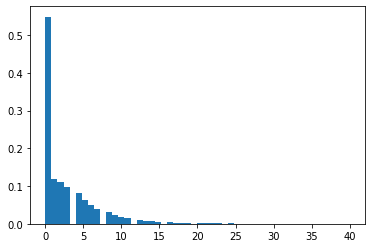

In [83]:
import matplotlib.pyplot as plt

plt.hist(queue_times, bins = 50, density=True)

(array([6.37398519e-03, 0.00000000e+00, 3.65945027e-02, 0.00000000e+00,
        0.00000000e+00, 1.13361886e-01, 0.00000000e+00, 2.21565876e-01,
        0.00000000e+00, 0.00000000e+00, 3.37807237e-01, 0.00000000e+00,
        3.98751482e-01, 0.00000000e+00, 0.00000000e+00, 4.00428846e-01,
        0.00000000e+00, 3.48905799e-01, 0.00000000e+00, 0.00000000e+00,
        2.55420683e-01, 0.00000000e+00, 1.71440632e-01, 0.00000000e+00,
        0.00000000e+00, 1.02752555e-01, 0.00000000e+00, 5.60798873e-02,
        0.00000000e+00, 0.00000000e+00, 2.75507123e-02, 0.00000000e+00,
        1.37963232e-02, 0.00000000e+00, 0.00000000e+00, 5.85679780e-03,
        0.00000000e+00, 2.15261781e-03, 0.00000000e+00, 0.00000000e+00,
        6.98901885e-04, 0.00000000e+00, 2.93538792e-04, 0.00000000e+00,
        0.00000000e+00, 1.11824302e-04, 0.00000000e+00, 1.39780377e-05,
        0.00000000e+00, 4.19341131e-05]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8, 

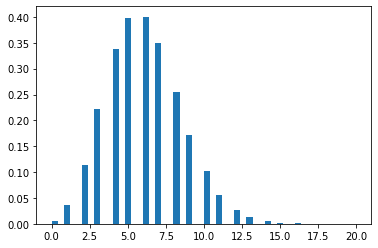

In [84]:
plt.hist(service_times, bins = 50, density=True)

(array([1.18658009e-03, 7.44252852e-03, 2.41726865e-02, 4.93020921e-02,
        8.07309333e-02, 1.05922464e-01, 1.18943782e-01, 1.22801721e-01,
        1.11948551e-01, 0.00000000e+00, 9.68025705e-02, 8.11968679e-02,
        6.56719274e-02, 5.28369825e-02, 4.07537455e-02, 3.21494867e-02,
        2.51231931e-02, 1.96872896e-02, 1.54876658e-02, 0.00000000e+00,
        1.20397498e-02, 9.38702888e-03, 7.50465313e-03, 5.89562568e-03,
        4.80223251e-03, 3.67156457e-03, 3.05031845e-03, 2.44770971e-03,
        1.85752590e-03, 0.00000000e+00, 1.58417761e-03, 1.30461685e-03,
        1.05611840e-03, 7.76557650e-04, 8.13832418e-04, 5.71546431e-04,
        5.09421819e-04, 4.10022439e-04, 3.29260444e-04, 0.00000000e+00,
        1.98798759e-04, 1.98798759e-04, 1.67736452e-04, 1.11824302e-04,
        7.45495344e-05, 3.72747672e-05, 8.07619956e-05, 2.48498448e-05,
        3.72747672e-05, 6.21246120e-06]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ,
         9.9, 10.8, 

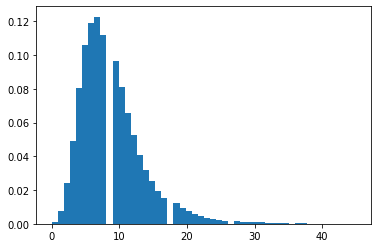

In [85]:
plt.hist(system_times, bins = 50, density=True)

In [87]:
over_time_limit = []
for i in system_times:
    if i > 10:
        over_time_limit.append(i)

len(over_time_limit)/len(system_times)

0.27959430143358754